# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`При зафиксированном seed функции со случайным исходом будут давать одинаковый результат. Это помогает, например, для корректного сравнения результатов.`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# 10 случайных строк тренировочного датасета

df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
# 5 первых объектов тестового датасета

df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
# 5 последних объектов тестового датасета

df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
def na_in_cols_print(na_in_cols):
    if not na_in_cols.empty:
        for col, count in na_in_cols.items():
            print(f"* {col}: {count} пропусков")
    else:
        print("Пропусков в датасете нет.")

In [7]:
# Пропуски тренировочного датасета

na_in_cols_train = df_train.isna().sum()[df_train.isna().sum() > 0]

In [8]:
na_in_cols_print(na_in_cols_train)

* mileage: 202 пропусков
* engine: 202 пропусков
* max_power: 196 пропусков
* torque: 203 пропусков
* seats: 202 пропусков


In [9]:
# Пропуски тестового датасета

na_in_cols_test = df_test.isna().sum()[df_test.isna().sum() > 0]

In [10]:
na_in_cols_print(na_in_cols_test)

* mileage: 19 пропусков
* engine: 19 пропусков
* max_power: 19 пропусков
* torque: 19 пропусков
* seats: 19 пропусков


In [11]:
# Явные дубликаты

print(f'Количество явных дубликатов в тренировочном датасете - {df_train.duplicated().sum()}')
print(f'Количество явных дубликатов в тестовом датасете - {df_test.duplicated().sum()}')

Количество явных дубликатов в тренировочном датасете - 985
Количество явных дубликатов в тестовом датасете - 62


**`Дашборды (бонусное задание)`**

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
report_1 = ProfileReport(df_train)
report_1.to_file("Train_report.html")

/Users/dara/opt/anaconda3/lib/python3.9/site-packages/ydata_profiling/profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report_2 = ProfileReport(df_test)
report_2.to_file("Test_report.html")

/Users/dara/opt/anaconda3/lib/python3.9/site-packages/ydata_profiling/profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:
medians = df_train.median(numeric_only=True)
medians

,0
year,2015.0
selling_price,450000.0
km_driven,60000.0
seats,5.0


In [13]:
df_train = df_train.fillna(medians)

df_test = df_test.fillna(medians)

print('TRAIN')
na_in_cols_train = df_train.isna().sum()[df_train.isna().sum() > 0]
na_in_cols_print(na_in_cols_train)
print('TEST')
na_in_cols_test = df_test.isna().sum()[df_test.isna().sum() > 0]
na_in_cols_print(na_in_cols_test)

TRAIN
* mileage: 202 пропусков
* engine: 202 пропусков
* max_power: 196 пропусков
* torque: 203 пропусков
TEST
* mileage: 19 пропусков
* engine: 19 пропусков
* max_power: 19 пропусков
* torque: 19 пропусков


### **Задание 2 (0.5 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [14]:
# Удаляем целевую переменную

features = df_train.drop(columns=['selling_price'])

In [15]:
# Проверяем дубликаты, учитывая все строки, которые имеют одинаковые значения в признаковом описании (keep=False)

duplicates = df_train[features.duplicated(keep=False)]
print('Количество дубликатов по признаковым описаниям, учитывая все строки - ', features.duplicated(keep=False).sum())

Количество дубликатов по признаковым описаниям, учитывая все строки -  1799


In [16]:
# Отображение дублирующихся объектов

duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [17]:
# Удаляем повторяющиеся строки.
# Если при одинаковом признаковом описании цены на автомобили отличаются, то оставляем первую строку по этому автомобилю

df_train = df_train[~features.duplicated(keep='first')]

In [18]:
# Обновляем индексы строк таким образом, чтобы они шли от 0 без пропусков

df_train.reset_index(drop=True,inplace=True)

In [19]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [20]:
# Убираем  ` kmpl`, ` km/kg`

df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

In [21]:
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

In [22]:
# Убираем ` CC`

df_train['engine'] = df_train['engine'].str.replace(' CC', '').astype(float)

In [23]:
df_test['engine'] = df_test['engine'].str.replace(' CC', '').astype(float)

In [24]:
# Убираем ` bhp`, при приведении к float ошибки заполняются NA

df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '')
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')

In [25]:
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '').astype(float)

In [26]:
# Удалем столбец `torque`

df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

In [27]:
# Заполним медианами и эти признаки

medians = df_train.median(numeric_only=True)
medians

,0
year,2014.00
selling_price,405000.00
km_driven,70000.00
mileage,19.37
engine,1248.00
max_power,81.86
seats,5.00


In [28]:
# Заменяем 0 на NA (поскольку не думаю, что мощность двигателя может быть равна 0)

df_train['max_power'] = df_train['max_power'].replace(0, np.nan)
df_test['max_power'] = df_test['max_power'].replace(0, np.nan)

In [29]:
# Заменяем 0 на NA (не думаю, что расход топлива может быть равен 0)

df_train['mileage'] = df_train['mileage'].replace(0, np.nan)
df_test['mileage'] = df_test['mileage'].replace(0, np.nan)

In [30]:
df_train = df_train.fillna(medians)

df_test = df_test.fillna(medians)

In [31]:
print('TRAIN')
na_in_cols_train = df_train.isna().sum()[df_train.isna().sum() > 0]
na_in_cols_print(na_in_cols_train)
print('TEST')
na_in_cols_test = df_test.isna().sum()[df_test.isna().sum() > 0]
na_in_cols_print(na_in_cols_test)

TRAIN
Пропусков в датасете нет.
TEST
Пропусков в датасете нет.


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [32]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [33]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [34]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [35]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.477276,1429.448973,87.948422,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.870475,485.662834,31.577884,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [36]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.358180,1454.87600,90.841670,5.403000
std,4.012149,7.585539e+05,48486.218662,3.904048,521.99574,34.893389,0.912921
min,1995.000000,3.100000e+04,1303.000000,9.500000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.370000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [37]:
# Убрали столбец `torque` для простоты, поэтому 13 в этом assert меняю количество столбцов на 12

assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

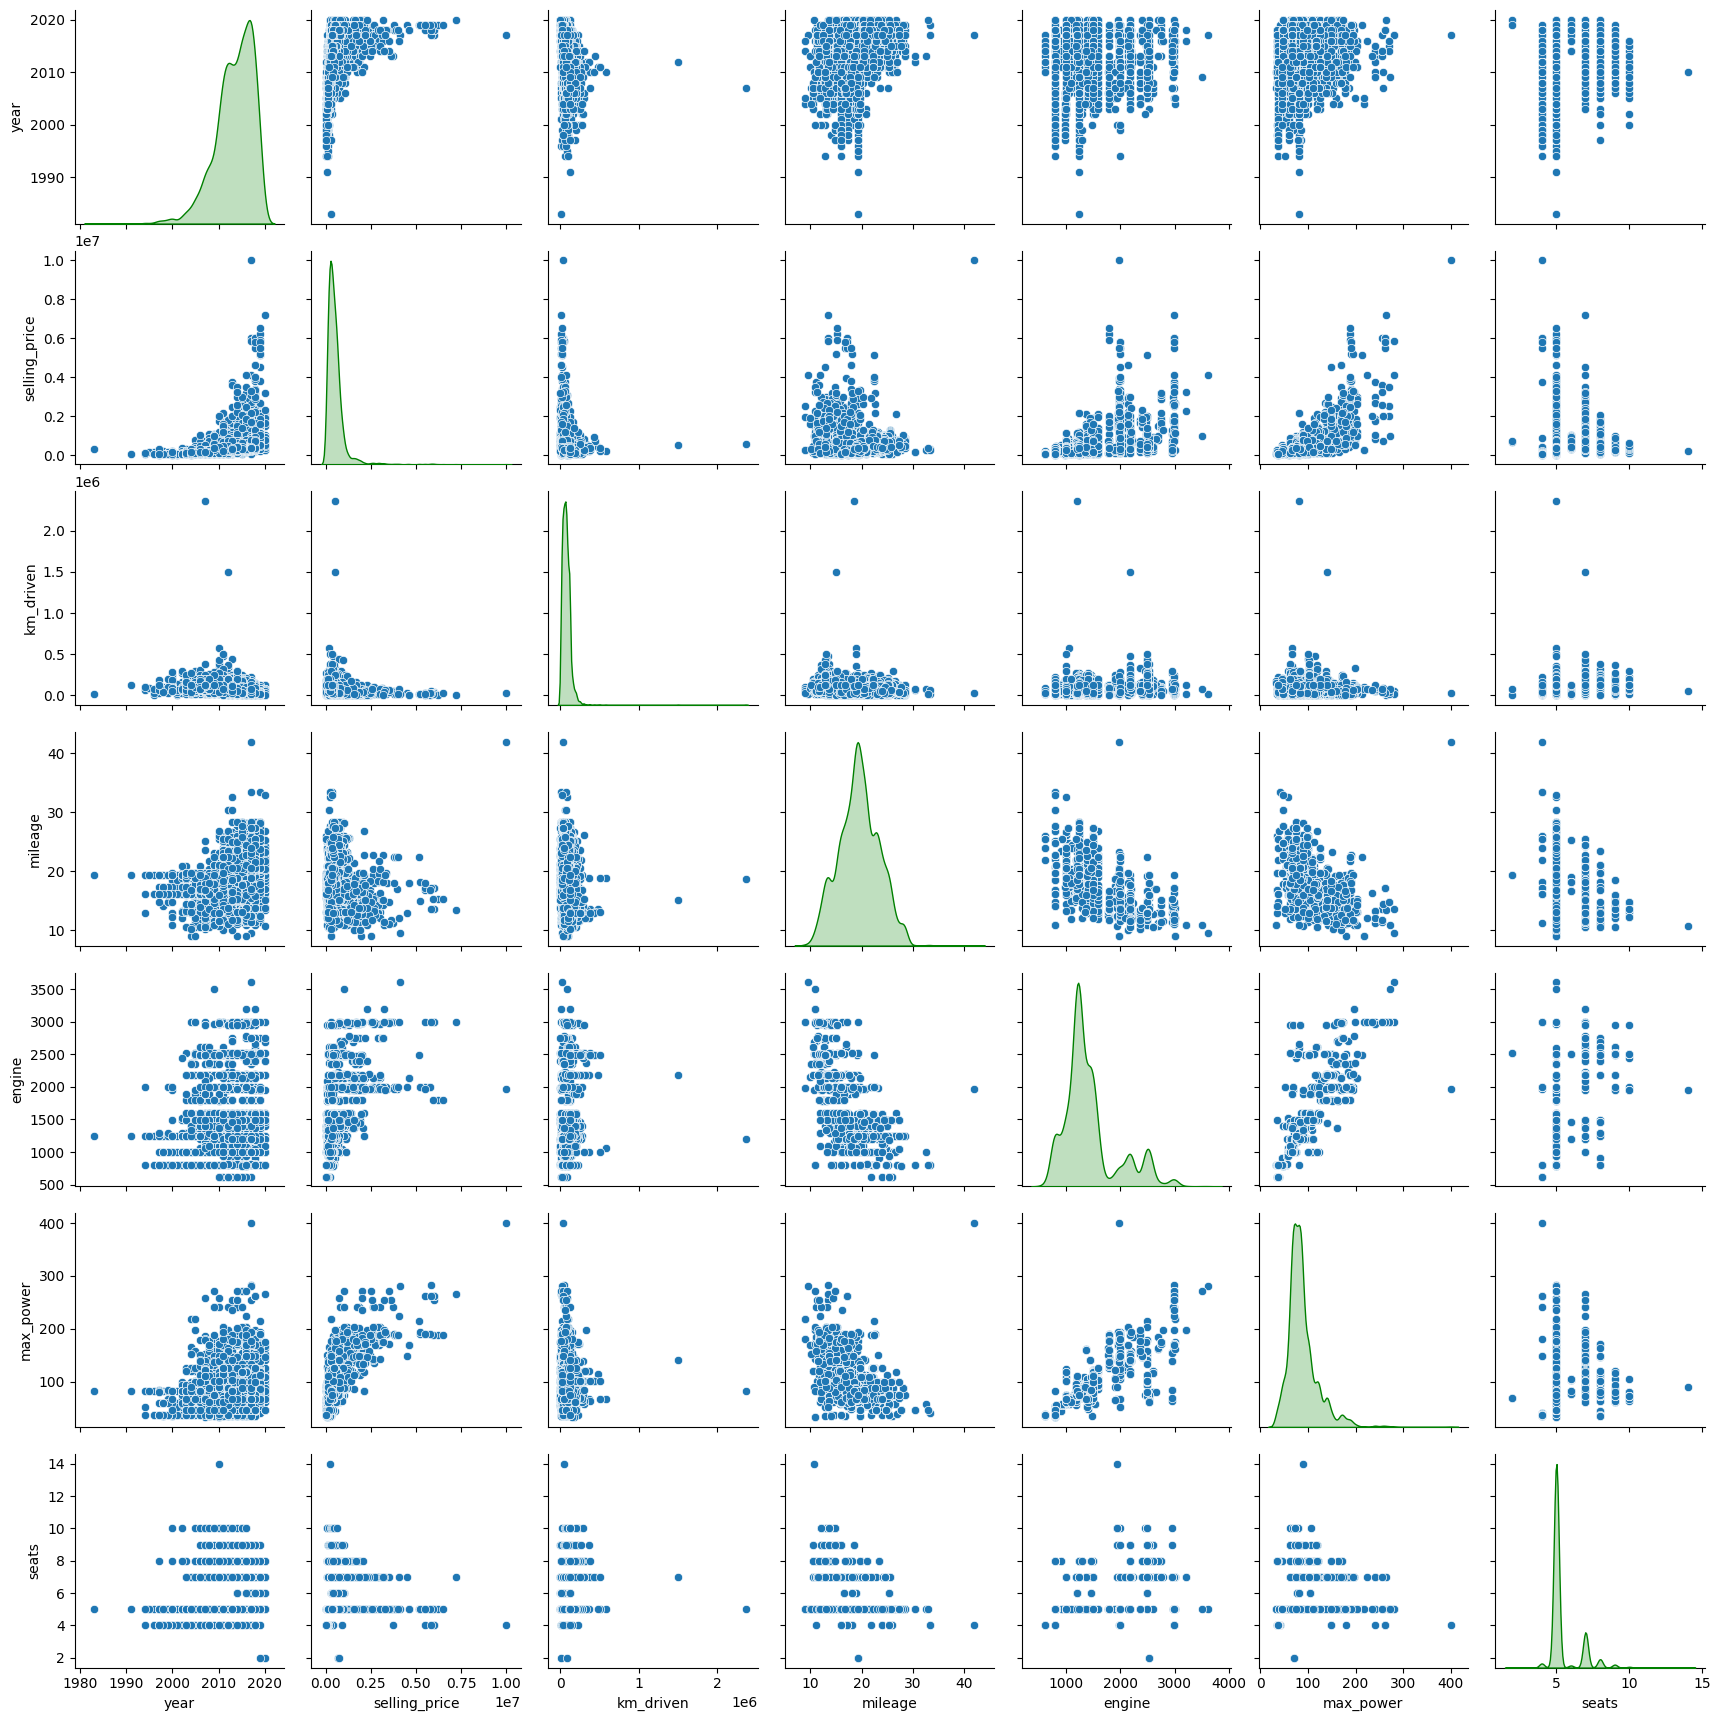

In [38]:
%matplotlib inline

sns.pairplot(df_train, diag_kind="kde", diag_kws={"color": "green"})
plt.show()

`Связь с целевой переменной`
* По году (`year`) можно сказать, что в тренировочном наборе данных для более новых машин цена возрастает;
* Для машин с маленьким пробегом (`km_driven`) цена также очень сильно возрастает;
* Расход топлива (`mileage`) не сильно коррелирует с целевой переменной, можно лишь сказать, что практически все машины имеют средний расход;
* Объем двигателя (`engine`), как мне кажется, имеет практически прямую зависимость, как и мощность двигателя (`max_power`) (т.е. чем мощнее - тем выше цена);
* Количество мест (`seats`) в автомобиле не сильно коррелирует, можно лишь сказать, что в тренировочном наборе наиболее распространены машины с 5 местами.


`Гипотезы о корреляции признаков`

Как мне кажется связаны между собой корреляцией следующие признаки:
* Мощность двигатели (`max_power`) и объем двигателя (`engine`);
* Расход топлива (`mileage`) объем двигателя (`engine`) и сюда же можно отнести мощность двигатели (`max_power`) (обратно коррелируемы).

Есть и другие зависимости, которые можно было бы проверить, например, связь между количеством мест и расходом топлива

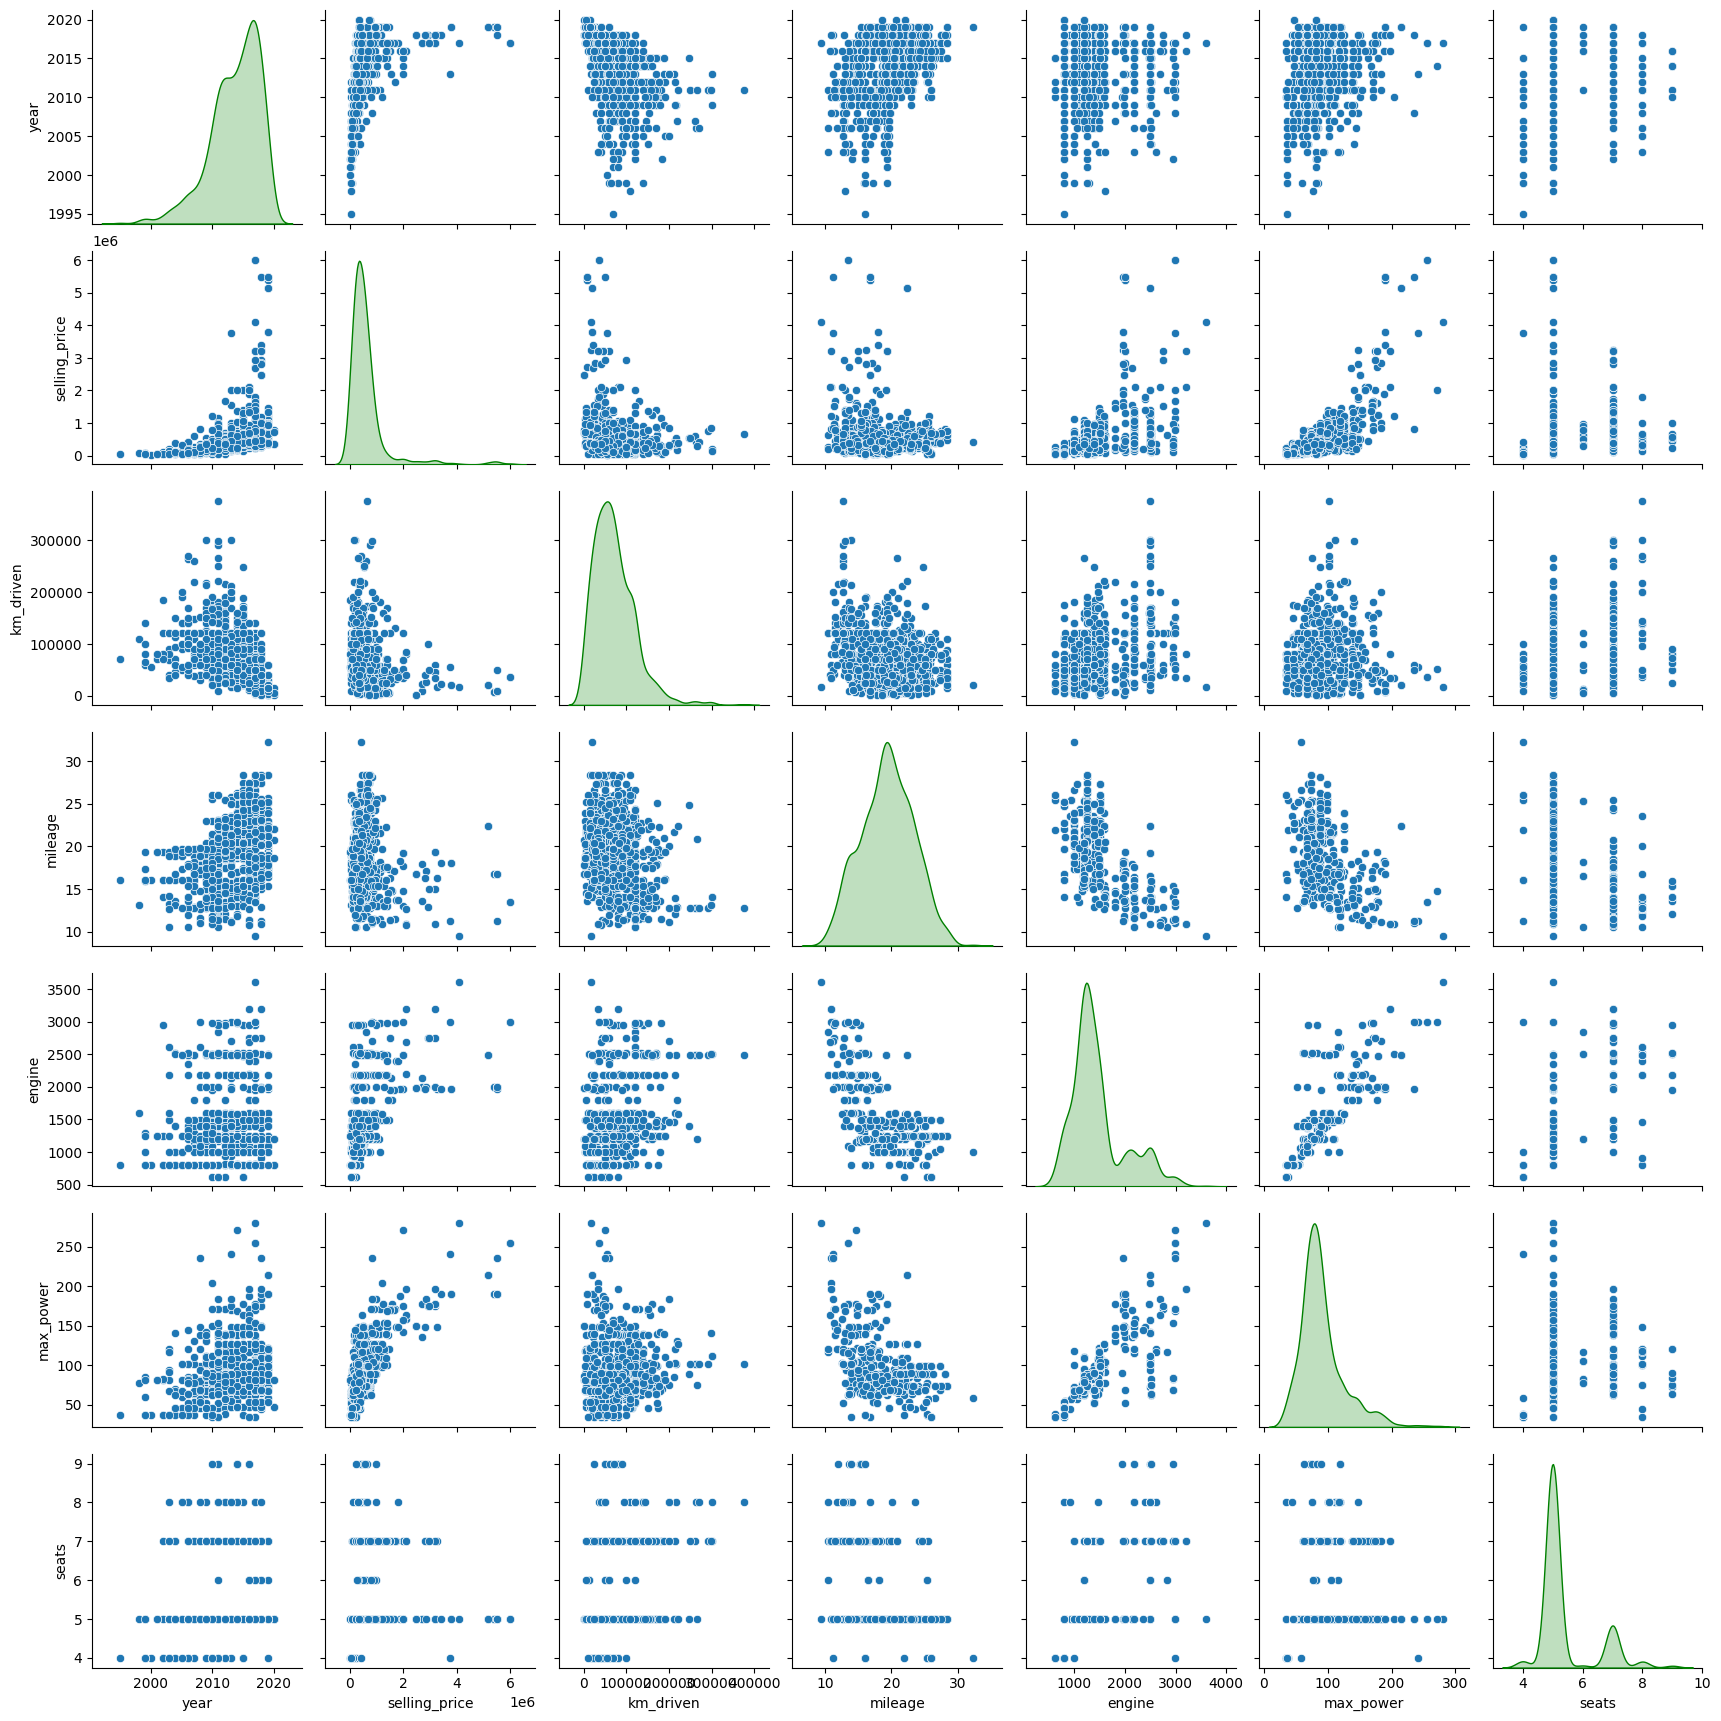

In [39]:
sns.pairplot(df_test, diag_kind="kde", diag_kws={"color": "green"})
plt.show()

В тесте данных меньше (оно и логично), поэтому распределения немного разнятся в плане выборок, но в основном все также.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [40]:
numeric_columns = df_train.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr(method='pearson')
corr_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.349218,0.002819,0.157138,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.103274,0.447672,0.693742,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.190622,0.229766,0.024539,0.192328
mileage,0.349218,-0.103274,-0.190622,1.000000,-0.586050,-0.384598,-0.474967
engine,0.002819,0.447672,0.229766,-0.586050,1.000000,0.681968,0.652172
max_power,0.157138,0.693742,0.024539,-0.384598,0.681968,1.000000,0.244017
seats,0.041178,0.149953,0.192328,-0.474967,0.652172,0.244017,1.000000


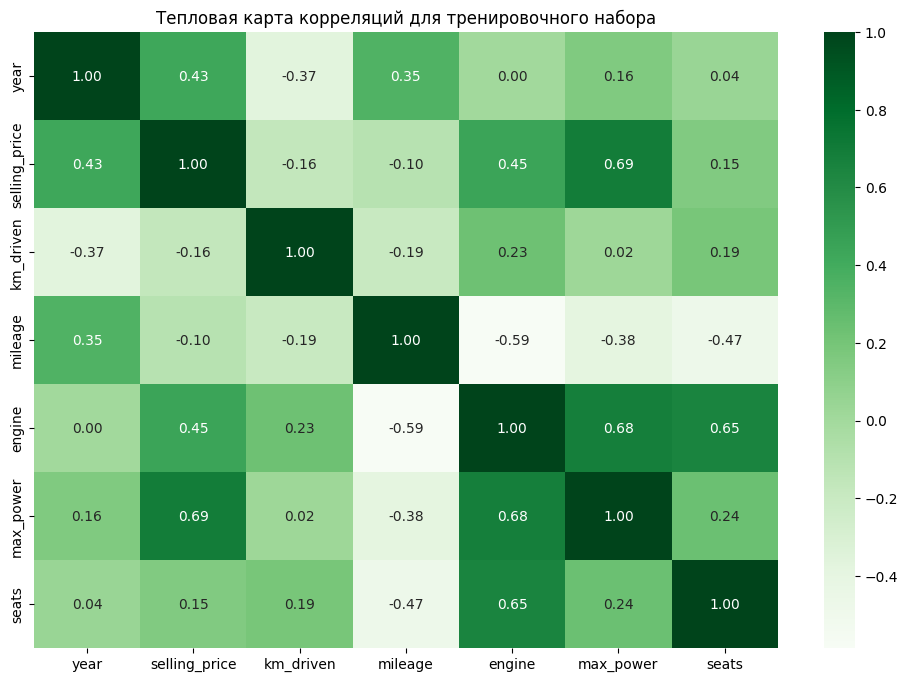

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.title("Тепловая карта корреляций для тренировочного набора")
plt.show()

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`1) Наименее скоррелированные признаки:`

* `year` и `engine` наименее скоррелированы между собой.

`2) Сильная положительная зависимость:`

* `selling_price` и `max_power` (чем больше мощность двигателя, тем выше цена продажи).

* `engine` и `max_power` (чем больше объём двигателя, тем больше его мощность).

* `engine` и `seats` (для более крупных машин с большим объёмом двигателя, как правило, имеют больше посадочных мест).

`3) Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?`

Между `year` и `km_driven` корреляция отрицательная, но она не велика (-0.37). В целом, можно сказать, что утверждение верно, но больше выглядит как логическая взаимосвязь, нежели правило для нашего датасета (подходит для ряда случаев).

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [42]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

In [43]:
y_train = df_train['selling_price']
X_train = df_train[num_cols].drop(columns='selling_price')

In [44]:
assert X_train.shape == (5840, 6)

In [45]:
y_test = df_test['selling_price']
X_test = df_test[num_cols].drop(columns='selling_price')

In [46]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Модель линейной регрессии с дефолтными параметрами

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred_1 = model.predict(X_test)

mse_train = MSE(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mse_train**0.5

mse_test = MSE(y_test, y_test_pred_1)
r2_test = r2_score(y_test, y_test_pred_1)
rmse_test = mse_test**0.5

print(f"R^2 train: {r2_train:.4f}")
print(f"MSE train: {mse_train:.4f}")
print(f"RMSE train: {rmse_train:.4f}\n")

print(f"R^2 test: {r2_test:.4f}")
print(f"MSE test: {mse_test:.4f}")
print(f"RMSE test: {rmse_test:.4f}")

R^2 train: 0.5939
MSE train: 116410888371.9593
RMSE train: 341190.3990

R^2 test: 0.5945
MSE test: 233120066103.7136
RMSE test: 482825.0885


`Выводы о дефолтной модели линейной регрессии:`
* Модель может объяснить около 59% дисперсии целевой переменной (результаты в train и test схожи);
* RMSE показывает, что среднее отклонение предсказания от реальной цены (таргета) составляет порядка 341 тысяч рублей на тренировочной выборке и 482 тысяч рублей на тестовой.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [48]:
from sklearn.preprocessing import StandardScaler

# Стандартизация значений

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Модель при стандартизации признаков

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_train_pred = model_scaled.predict(X_train_scaled)
y_test_pred_2 = model_scaled.predict(X_test_scaled)

mse_train = MSE(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mse_train**0.5

mse_test = MSE(y_test, y_test_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)
rmse_test = mse_test**0.5

print(f"R^2 train: {r2_train:.4f}")
print(f"MSE train: {mse_train:.4f}")
print(f"RMSE train: {rmse_train:.4f}\n")

print(f"R^2 test: {r2_test:.4f}")
print(f"MSE test: {mse_test:.4f}")
print(f"RMSE test: {rmse_test:.4f}")

R^2 train: 0.5939
MSE train: 116410888371.9591
RMSE train: 341190.3990

R^2 test: 0.5945
MSE test: 233120066103.7081
RMSE test: 482825.0885


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [50]:
coefficients = model_scaled.coef_

for i in range(len(X_train.columns)):
    print(X_train.columns[i], coefficients[i])

year 149096.37449212477
km_driven -44615.870165957574
mileage 36008.75736728507
engine 60850.280446447454
max_power 326183.75653438113
seats -19451.84025458702


Максимальный вес имеет признак `max_power` (мощность двигателя).

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [51]:
from sklearn.linear_model import Lasso

# Модель Lasso-регрессии с дефолтными параметрами

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = model_lasso.predict(X_train_scaled)
y_test_pred_lasso = model_lasso.predict(X_test_scaled)

mse_train_lasso = MSE(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_train_lasso = mse_train_lasso**0.5

mse_test_lasso = MSE(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
rmse_test_lasso = mse_test_lasso**0.5

print(f"R^2 train: {r2_train_lasso:.4f}")
print(f"MSE train: {mse_train_lasso:.4f}")
print(f"RMSE train: {rmse_train_lasso:.4f}\n")

print(f"R^2 test: {r2_test_lasso:.4f}")
print(f"MSE test: {mse_test_lasso:.4f}")
print(f"RMSE test: {rmse_test_lasso:.4f}\n")

R^2 train: 0.5939
MSE train: 116410888382.0274
RMSE train: 341190.3990

R^2 test: 0.5945
MSE test: 233120723950.2163
RMSE test: 482825.7698



In [52]:
# Коэффициенты для Lasso

coefficients_lasso = model_lasso.coef_

for i in range(len(X_train.columns)):
    print(X_train.columns[i], coefficients_lasso[i])

year 149096.23127789143
km_driven -44614.73969477443
mileage 36006.85110796775
engine 60845.46983449655
max_power 326184.6095786998
seats -19449.02799667161


L-1 регуляризация со стандартными параметрами не занулила признаки. Это может быть из-за того, что коэффициент регуляризации не такой какой необходим для этого (по стандарту он равен 1). Также это может быть и из-за того, что все признаки важны для модели.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [53]:
from sklearn.model_selection import GridSearchCV
# Модель Lasso с подбором параметра

param_grid = {'alpha': np.logspace(-5, 5, 100)}
lasso = Lasso()

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='r2')

grid_search.fit(X_train_scaled, y_train)

print(f"Количество моделей, которые обучил GridSearch: {10 * len(param_grid['alpha'])}")
print(f"Лучший коэффициент регуляризации: {grid_search.best_params_['alpha']}")

best_model = grid_search.best_estimator_

coefficients_best_lasso = best_model.coef_
for i in range(len(X_train.columns)):
    print(X_train.columns[i], coefficients_best_lasso[i])

Количество моделей, которые обучил GridSearch: 1000
Лучший коэффициент регуляризации: 24770.76355991714
year 146685.3250328803
km_driven -17305.63289840154
mileage 0.0
engine 0.0
max_power 324024.1676374427
seats -0.0


In [54]:
y_train_pred = best_model.predict(X_train_scaled)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = MSE(y_train, y_train_pred)
train_rmse = train_mse**0.5

print(f"R^2 train: {train_r2:.4f}")
print(f"MSE train: {train_mse:.4f}")
print(f"RMSE train: {train_rmse:.4f}")

R^2 train: 0.5844
MSE train: 119117664544.3562
RMSE train: 345134.2703


In [55]:
y_test_pred_4 = best_model.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred_4)
test_mse = MSE(y_test, y_test_pred_4)
test_rmse = test_mse**0.5

print(f"R^2 test: {test_r2:.4f}")
print(f"MSE test: {test_mse:.4f}")
print(f"RMSE test: {test_rmse:.4f}")

R^2 test: 0.5672
MSE test: 248799638100.3977
RMSE test: 498798.1938


* Модель обучилась довольно быстро,было обучено 1000 моделей.

* Наилучшим коэффициентов регуляризации оказалось число 24770.76, занулилось при этом 3 признака: `mileage` (расход топлива), `engine` (объем двигателя) и `seats` (количество мест в машине).

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [56]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.logspace(-5, 5, 50),
    'l1_ratio': np.linspace(0.1, 1.0, 20)
}
model_elasticnet = ElasticNet()

grid_search_en = GridSearchCV(estimator=model_elasticnet, param_grid=param_grid, cv=10, scoring='r2')

grid_search_en.fit(X_train_scaled, y_train)

print(f"Количество моделей, которые обучил GridSearch: {10 * len(param_grid['alpha']) * len(param_grid['l1_ratio'])}")
print(f"Лучший коэффициент регуляризации: {grid_search_en.best_params_['alpha']}")
print(f"Лучший коэффициент l1_ratio: {grid_search_en.best_params_['l1_ratio']}")

best_model = grid_search_en.best_estimator_

coefficients_best_en = best_model.coef_
for i in range(len(X_train.columns)):
    print(X_train.columns[i], coefficients_best_en[i])

Количество моделей, которые обучил GridSearch: 10000
Лучший коэффициент регуляризации: 0.30888435964774846
Лучший коэффициент l1_ratio: 0.5263157894736842
year 140624.3548700877
km_driven -46308.58894481537
mileage 25077.01598191618
engine 82540.1502413629
max_power 269546.94777372474
seats -21193.744124651304


In [57]:
y_train_pred = best_model.predict(X_train_scaled)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = MSE(y_train, y_train_pred)
train_rmse = train_mse**0.5

print(f"R^2 train: {train_r2:.4f}")
print(f"MSE train: {train_mse:.4f}")
print(f"RMSE train: {train_rmse:.4f}")

R^2 train: 0.5863
MSE train: 118580171600.7308
RMSE train: 344354.7177


In [58]:
y_test_pred_5 = best_model.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred_5)
test_mse = MSE(y_test, y_test_pred_5)
test_rmse = test_mse**0.5

print(f"R^2 test: {test_r2:.4f}")
print(f"MSE test: {test_mse:.4f}")
print(f"RMSE test: {test_rmse:.4f}")

R^2 test: 0.5627
MSE test: 251348213572.1563
RMSE test: 501346.4008


* Модель обучалась чуть дольше, поскольку имеем несколько вариантов варьируемых гиперпараметров, но также достаточно быстро (меньше минуты).
* Лучшей оказалась модель с параметром регуляризации: 0.31 и параметром l1_ratio (доля L1 регуляризации) 0.53.`

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`

In [59]:
df_train = df_train.drop(columns='name')
df_test = df_test.drop(columns='name')

In [60]:
y_train_cat = df_train['selling_price']
X_train_cat = df_train.drop(columns='selling_price')

In [61]:
y_test_cat = df_test['selling_price']
X_test_cat = df_test.drop(columns='selling_price')

In [62]:
assert X_train_cat.shape == (5840, 10)

In [63]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [64]:
categorical_columns = list(X_train_cat.select_dtypes(include=['object']).columns)
categorical_columns.append('seats')

X_train_encoded = pd.get_dummies(X_train_cat, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_cat, columns=categorical_columns, drop_first=True)

In [65]:
print(list(X_train_encoded.columns))
print(list(X_test_encoded.columns))

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14']
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9']


In [66]:
miss_cols = list(set(X_train_encoded.columns) - set(X_test_encoded.columns))

In [67]:
X_test_encoded[miss_cols] = 0

In [68]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha': np.logspace(-6, 6, 1000)}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='r2')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

grid_search.fit(X_train_scaled, y_train)

print("Лучший коэффициент регуляризации:", grid_search.best_params_['alpha'])

best_model = grid_search.best_estimator_

coefficients_best = best_model.coef_
for i in range(len(X_train.columns)):
    print(X_train.columns[i], coefficients_best[i])

Лучший коэффициент регуляризации: 620.5728806776514
year 133766.73956385822
km_driven -33976.0063477332
mileage 29685.1081006183
engine 60534.55877462764
max_power 240428.50410845477
seats 17484.90986411542


In [70]:
y_train_pred = best_model.predict(X_train_scaled)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = MSE(y_train, y_train_pred)
train_rmse = train_mse**0.5

print(f"R^2 train: {train_r2:.4f}")
print(f"MSE train: {train_mse:.4f}")
print(f"RMSE train: {train_rmse:.4f}")

R^2 train: 0.6640
MSE train: 96299424139.1944
RMSE train: 310321.4851


In [71]:
y_test_pred_6 = best_model.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred_6)
test_mse = MSE(y_test, y_test_pred_6)
test_rmse = test_mse**0.5

print(f"R^2 test: {test_r2:.4f}")
print(f"MSE test: {test_mse:.4f}")
print(f"RMSE test: {test_rmse:.4f}")

R^2 test: 0.6075
MSE test: 225648209283.5672
RMSE test: 475024.4302


`ИТОГ`

Если пройтись по метрикам каждой модели, то можно заметить, что при использовании категориальных переменных + Ridge регрессии нам удалось увеличить (хоть и не сильно) метрику $R^2$ до 0.61 на тесте и у меньшить до 475 тысяч RMSE на тестовых данных. Поэтому я считаю, что можно говорить, что не на много качество прогноза увеличилось.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [72]:
def business_metric(y_true, y_pred):

    # различие от реальных цен авто
    diff_true = np.abs(y_true - y_pred) / y_true
    # Количество у которых не более 10% отличие
    success_count = np.sum(diff_true <= 0.1)
    # Доля в общем количестве
    return success_count / len(y_true)

print(f'Модель линейной регрессии с дефолтными параметрами: {business_metric(y_test, y_test_pred_1)*100:.2f}%')
print(f'Модель линейной регрессии со стандартизацией: {business_metric(y_test, y_test_pred_2)*100:.2f}%')
print(f'Модель линейной регрессии Lasso дефолтная: {business_metric(y_test, y_test_pred_lasso)*100:.2f}%')
print(f'Модель линейной регрессии Lasso с подобранным коэффициентом: {business_metric(y_test, y_test_pred_4)*100:.2f}%')
print(f'Модель линейной регрессии ElasticNet: {business_metric(y_test, y_test_pred_5)*100:.2f}%')
print(f'Модель линейной регрессии Ridge: {business_metric(y_test, y_test_pred_6)*100:.2f}%')

Модель линейной регрессии с дефолтными параметрами: 22.40%
Модель линейной регрессии со стандартизацией: 22.40%
Модель линейной регрессии Lasso дефолтная: 22.40%
Модель линейной регрессии Lasso с подобранным коэффициентом: 23.60%
Модель линейной регрессии ElasticNet: 24.80%
Модель линейной регрессии Ridge: 25.80%


`По бизнес-метрике лучшей является модель с Ridge регрессией, учитвая категориальные переменные.`

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

